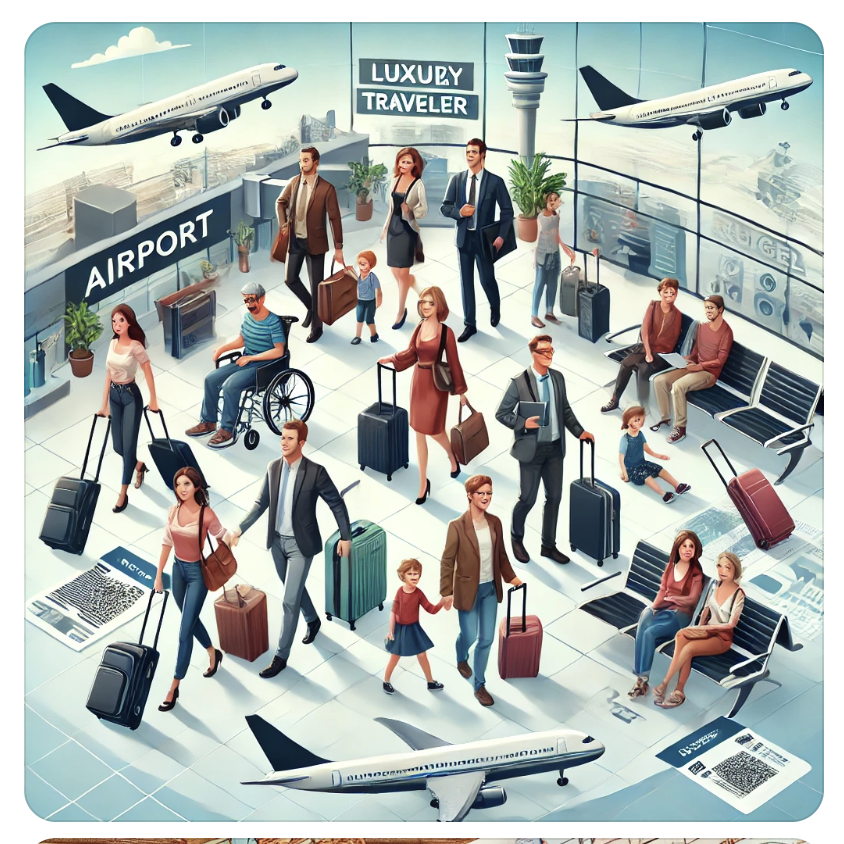


#**Executive Summary - Traveltide Loyalty Program**


##**Introduction**

In our current project,Travel Tide a prominent travel platform with over 1.6 million users and more than 5 million app sessions, seeks to improve user engagement by introducing a personalized rewards program. The goal of this project was to segment users based on their travel behavior and assign tailored perks that would encourage greater usage and loyalty.

The five perks proposed by marketing department are: Free hotel meal,Free checked in bag, No cancellation fees , Exclusive Discounts, 1 night free hotel with flight. First, we need to verify whether we have data to justify that clients would indeed be truly interested in such perks and then allocate each customer to the right one.

This executive summary outlines the approach taken, user segmentation strategies, key findings, and recommendations to launch a rewards program that targets active users effectively.


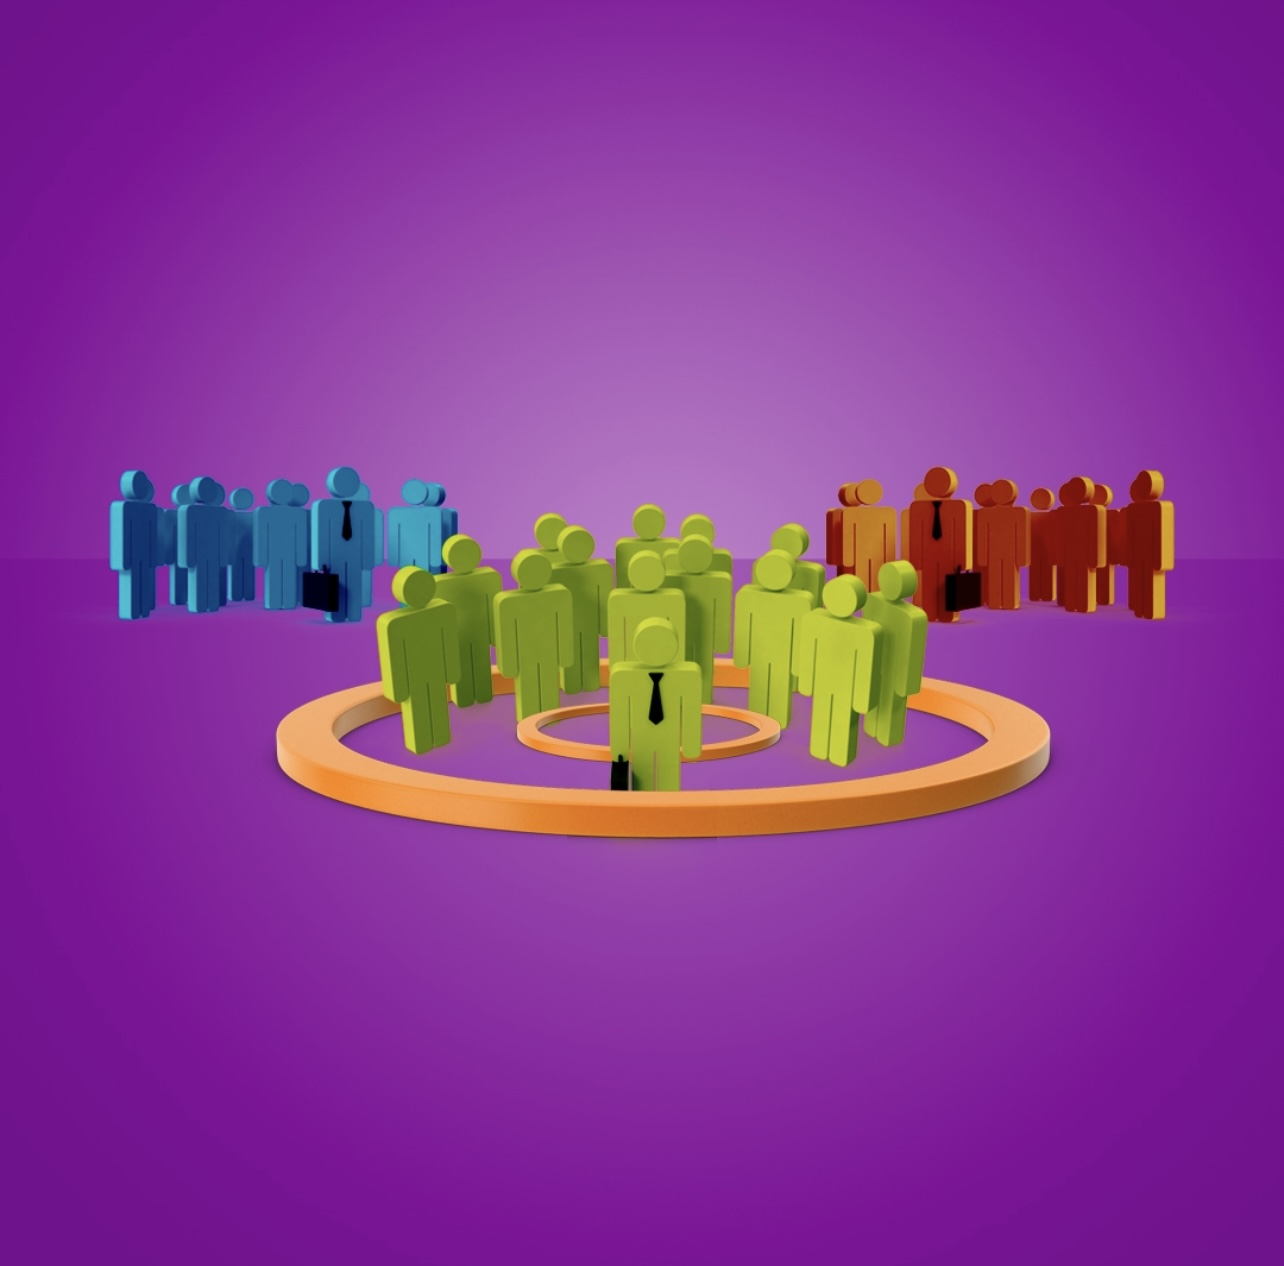


##**Methodology**

To identify users eligible for the rewards program, we considered those who had been active since January 4, 2023. After filtering users with more than 7 sessions during this period, we determined that 5,998 users were eligible. Older data were excluded to focus on recent travel behaviors.We used advanced SQL queries, Google sheet to clean our Data and group our customers into 7 different segments each aligned with proposed perks and Tableau to do further analysis.
In our analysis we considered various customer interactions, such as booking behaviors, booked hotel info, booked flight info, spending behaviour  etc. Indexes were derived from  atleast 2 metrics. Additional groups emerged during the analysis that could not be easily categorized, leading to the addition  of an uncategorized groups.


Total numbers of Active Users


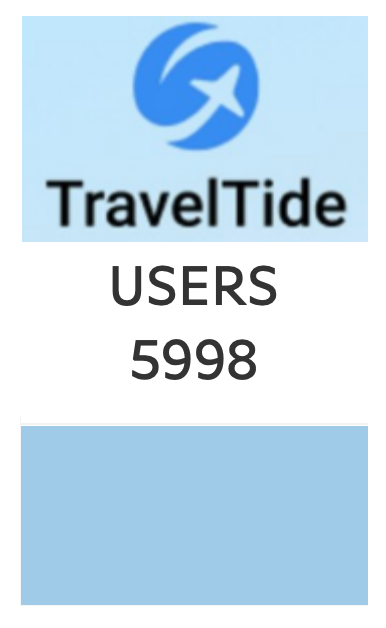

A bar chart showing Users per Session


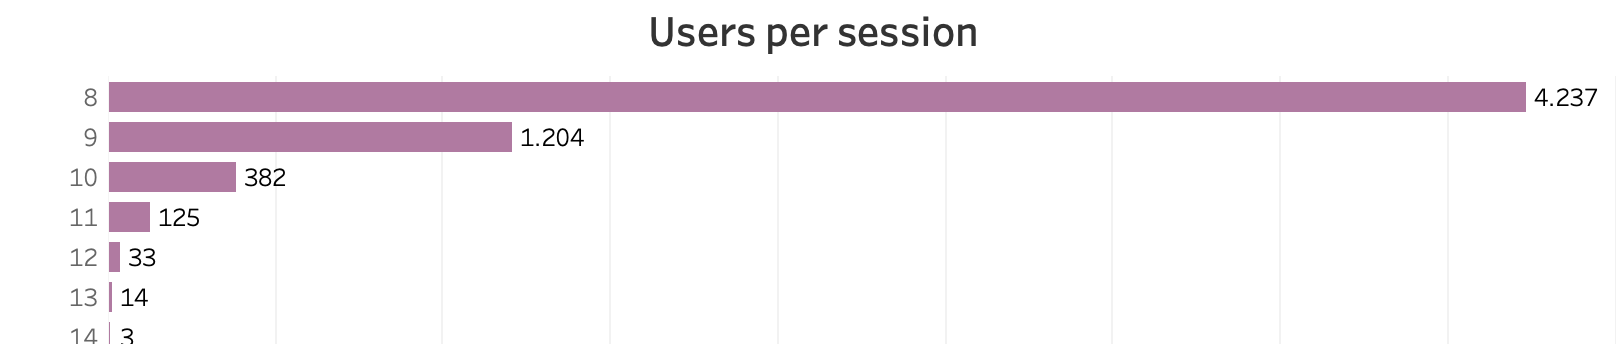

#Customer Segmentation Strategy

To ensure that perks were aligned with user preferences, we segmented users into seven distinct groups based on travel behavior metrics like:

Total trips,
Average hotel stays,
Flight booking behavior,
Spending patterns.

The 7 segments are:

Family Vacationers,
High-Spending Travelers,
Budget-Conscious Travelers,
Frequent Travelers,
Spontaneous Travelers,
Moderate Travelers,
Occasional Travelers,

Charts showing the criteria used to classify users into segments

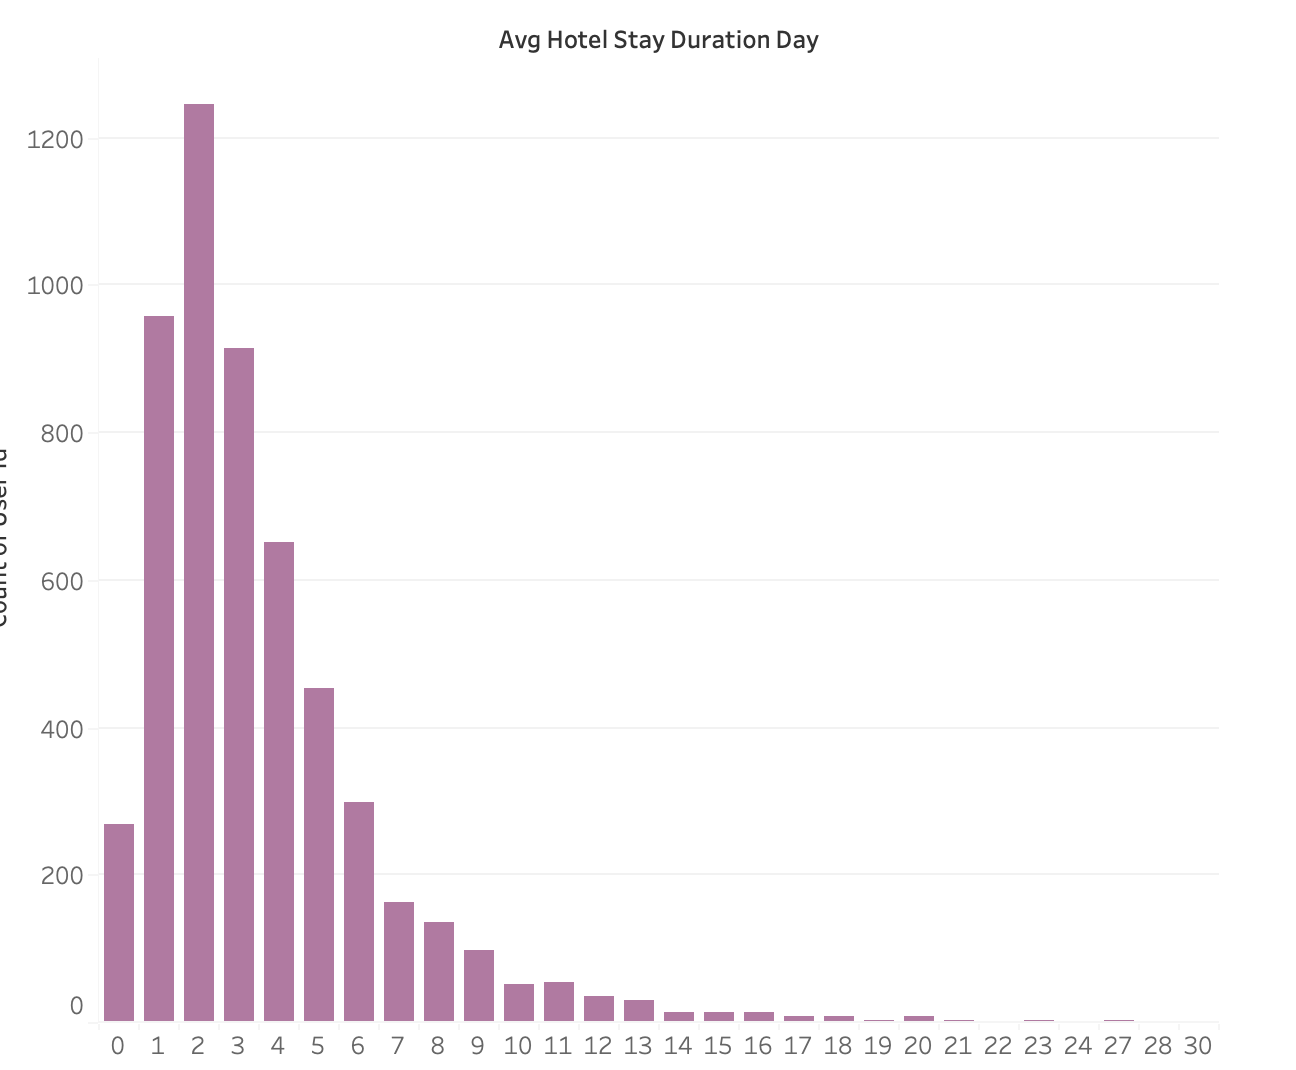

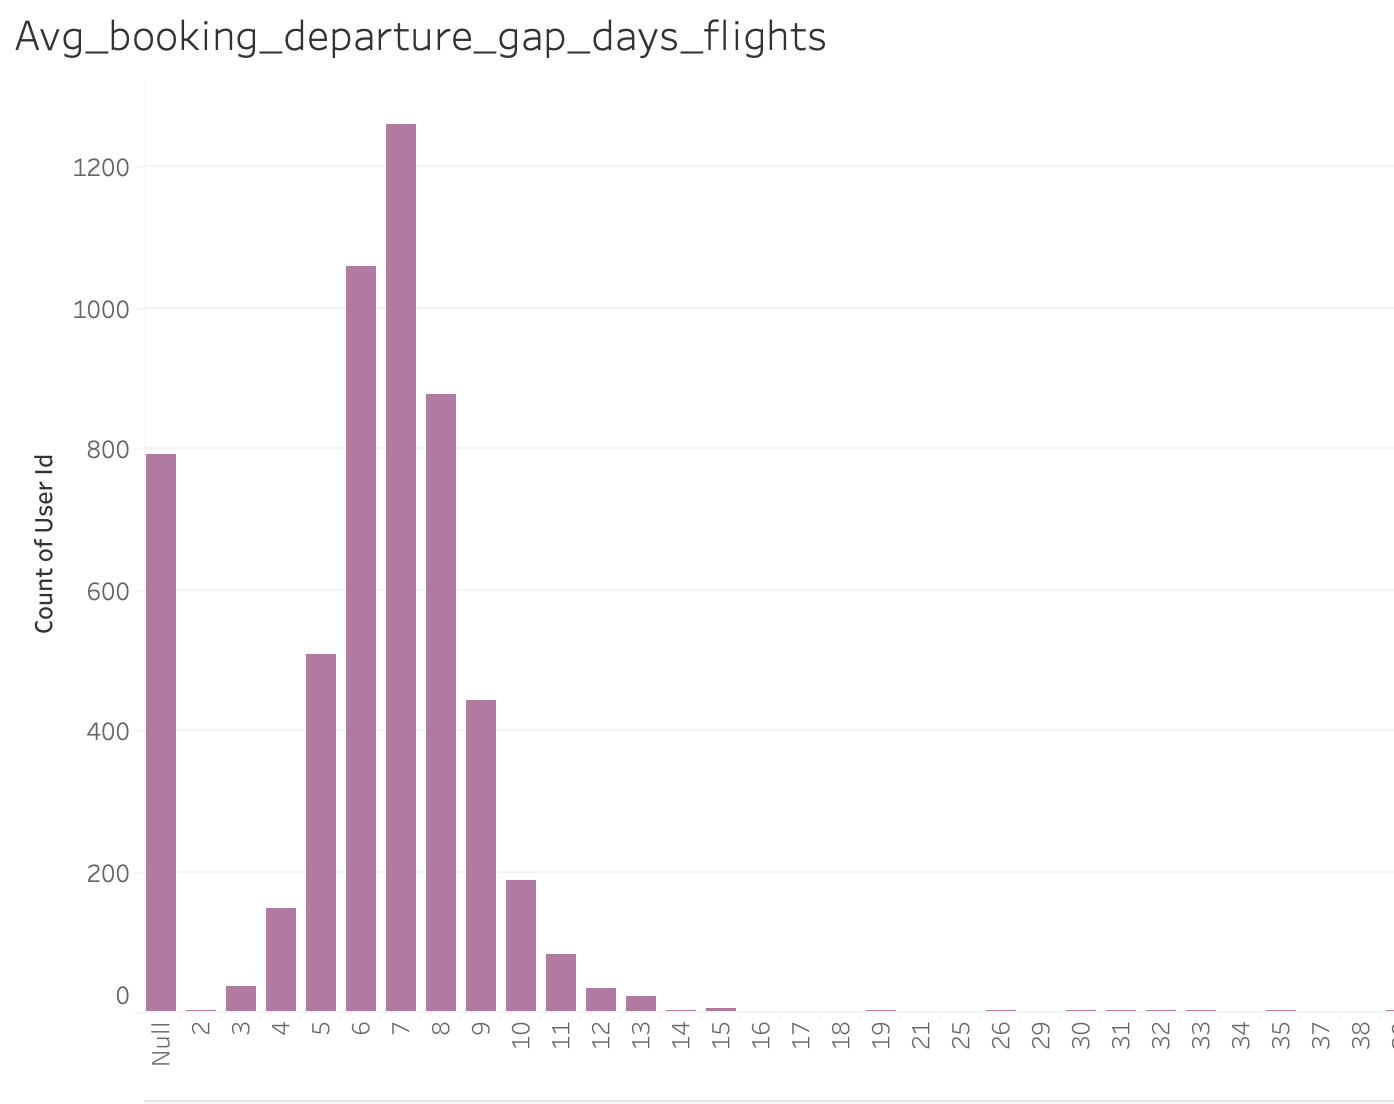


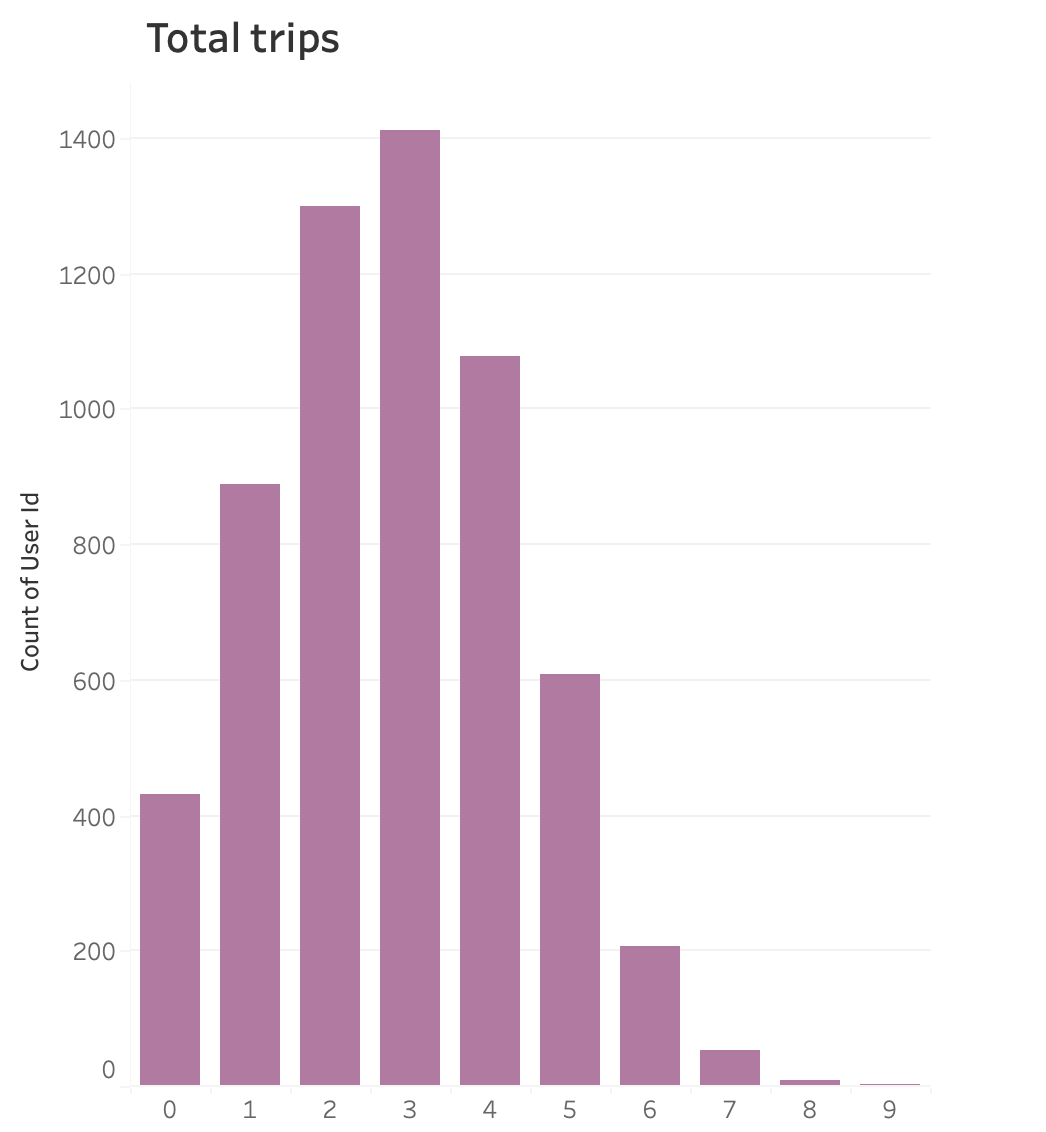

#Group Descriptions and Perk Allocation

Each segment was assigned a tailored perk based on their behavior and preferences:

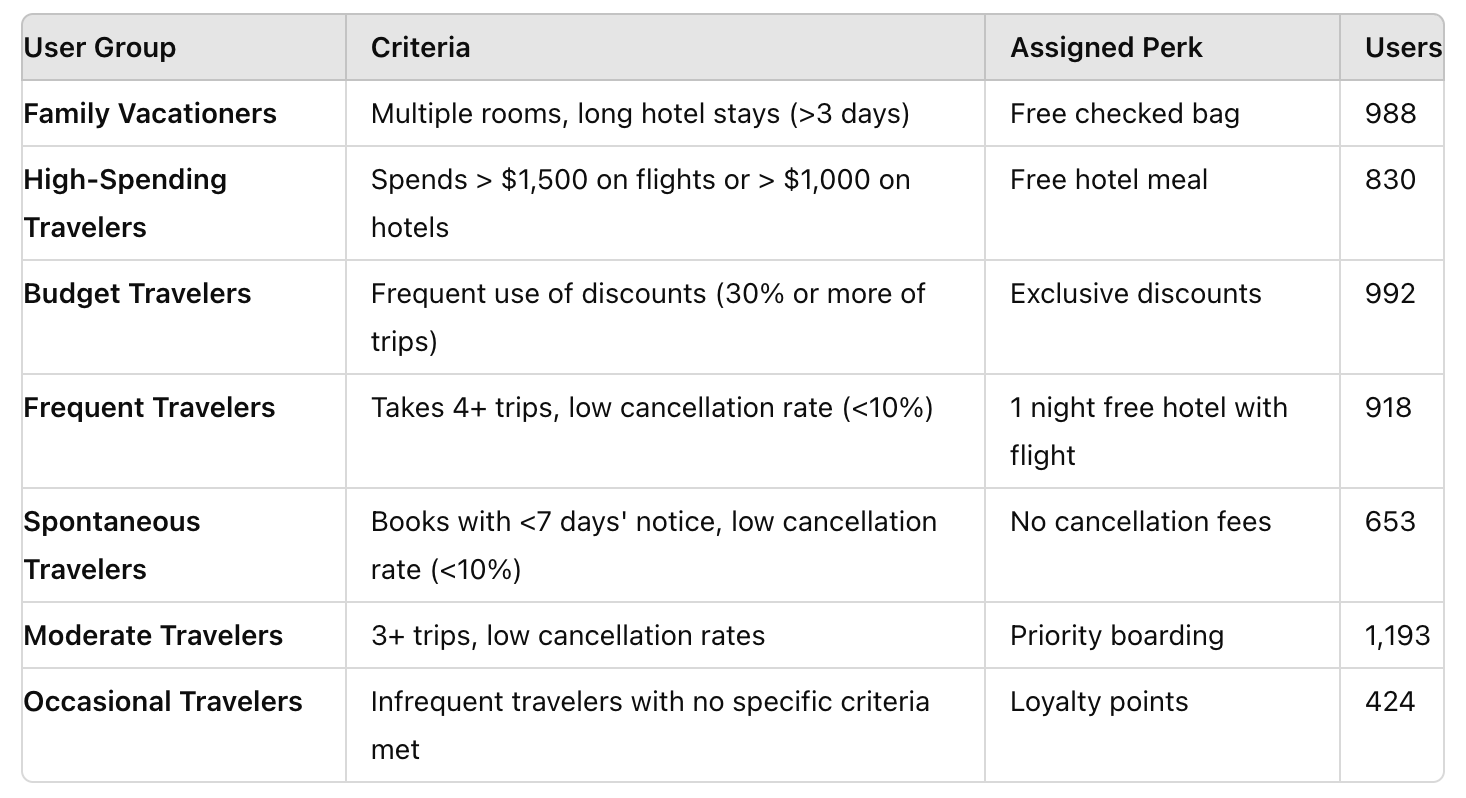


Bar chart showing the number of users in each group

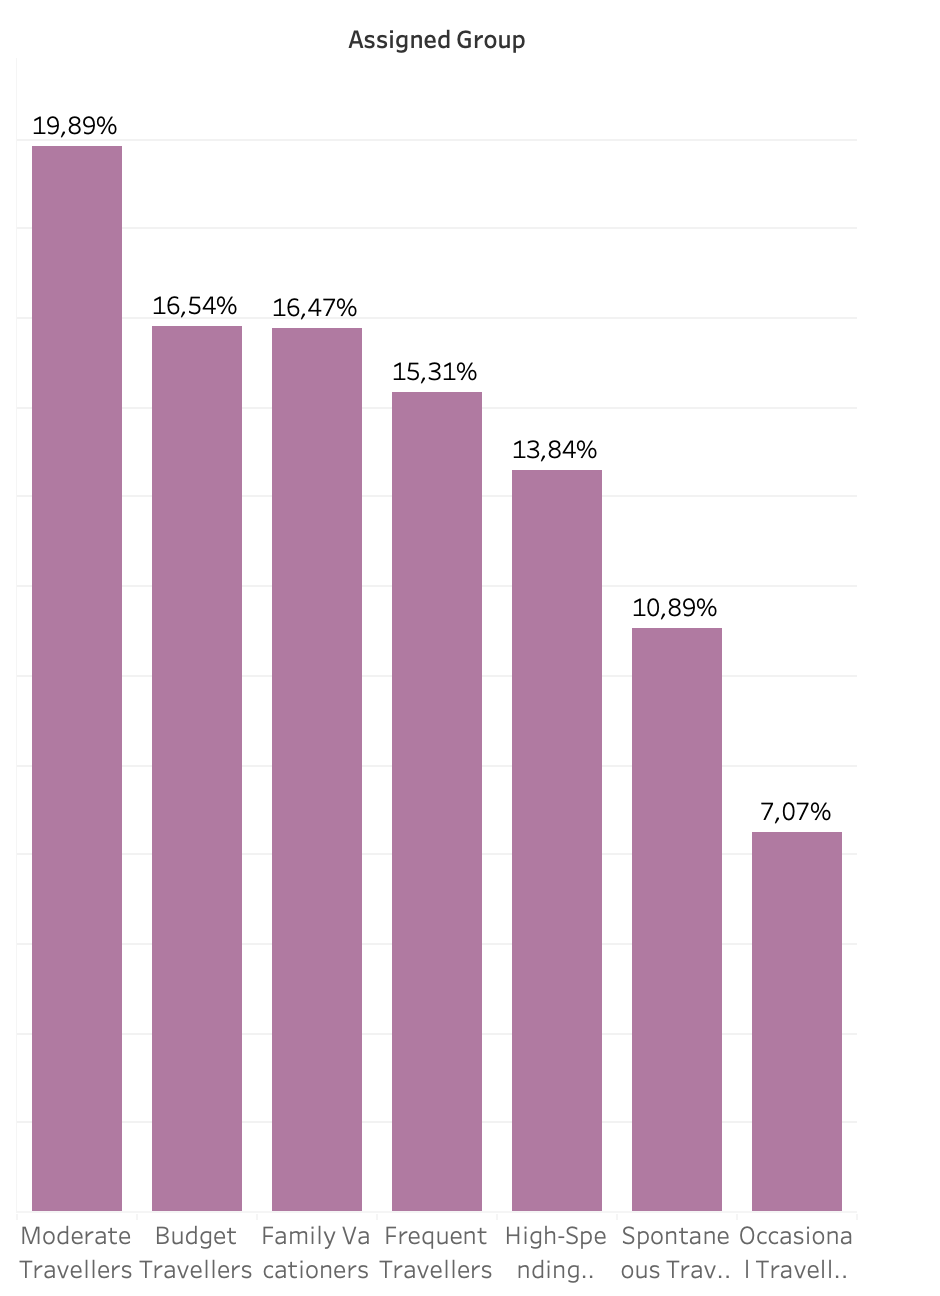

Pie chart showing the distribution of perks in each group

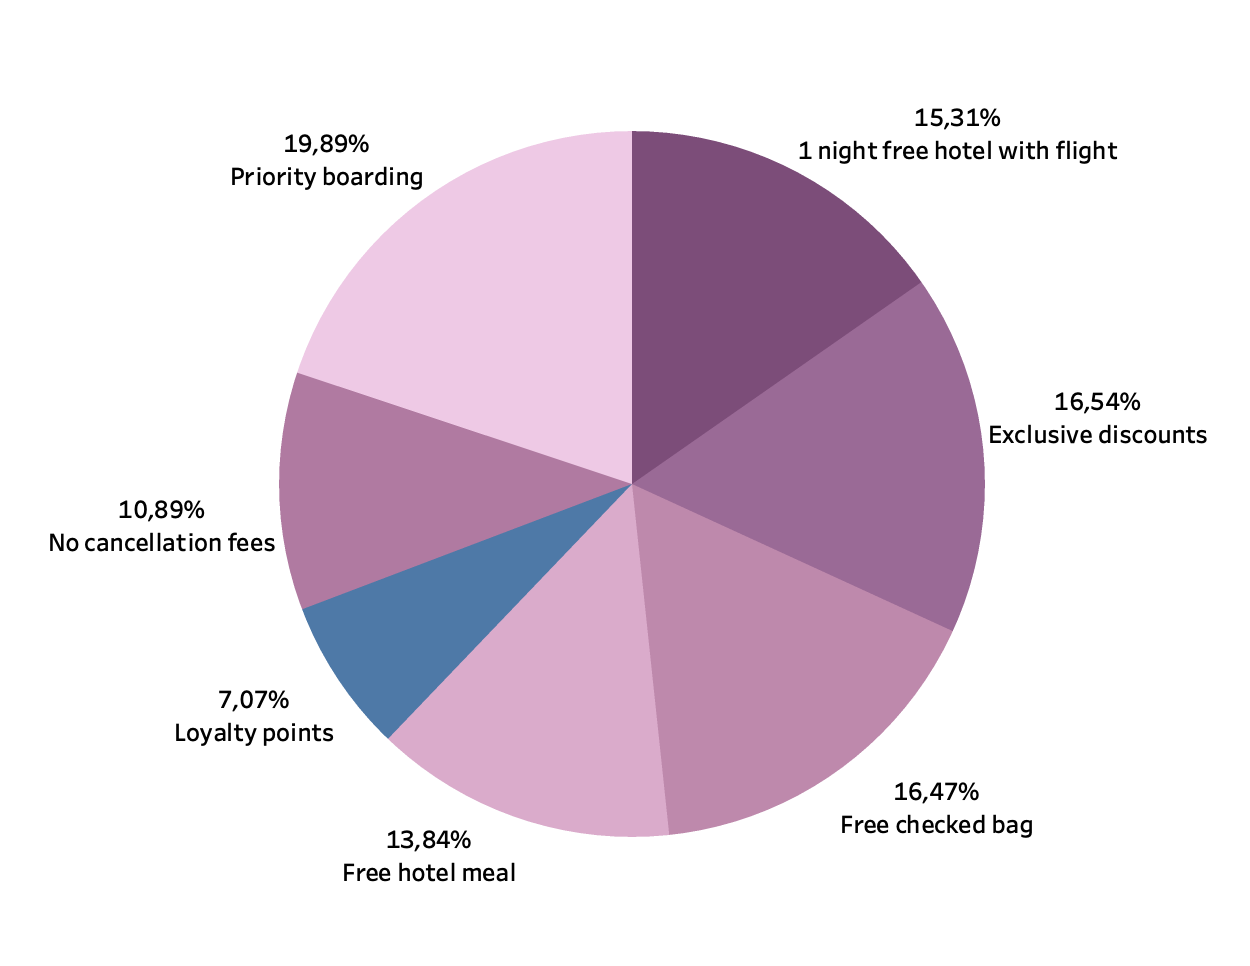

##**Summary**

**Finding 1: Moderate Travelers**

Who are they?
Users who take more than 3 trips or have low cancellation rates.
Why this perk?
They prefer convenient travel but don’t necessarily need luxury perks.
Perk: "Priority boarding" – ensures a smoother travel experience.
Total Users: 1,193


**Finding 2: Budget-Conscious Travelers**

Who are they?
Travelers who frequently use discounted flights or hotels (over 30% of their bookings are discounted).
Why this perk?
They look for deals and appreciate savings.
Perk: "Exclusive discounts" – gives them ongoing cost-saving opportunities.
Total Users: 992


**Finding 3:  Family Vacationers**

Who are they?
Customers who book multiple rooms and longer stays (more than 3 days), usually traveling with family.
Why this perk?
These users appreciate savings and convenience when traveling as a group.
Perk: "Free checked bag" – helpful for families with extra luggage.
Total Users: 988

**Finding 4: Frequent Travelers**

Who are they?
Users who take 4 or more trips and have a low cancellation rate (less than 10%).
Why this perk?
They value consistency and reliability in their travels.
Perk: "1 night free hotel with flight" – rewards frequent bookings.
Total Users: 918

**Finding 5: High-Spending Travelers**

Who are they?
Customers who spend more than 1,500 Dollars on flights or 1,000 Dollars on hotels.
Why this perk?
These users enjoy premium services and high-end experiences.
Perk: "Free hotel meal" – adds to their luxury experience.
Total Users: 830

**Finding 6: Spontaneous Travelers**

Who are they?
Users who book flights with less than 7 days' notice and have a low cancellation rate (under 10%).
Why this perk?
They appreciate flexibility and freedom from restrictions.
Perk: "No cancellation fees" – reduces barriers to last-minute bookings.
Total Users: 653

**Finding 7: Occasional Travelers**

Who are they?
Users who don’t fit into the other categories, typically traveling less frequently.
Why this perk?
Even occasional users should feel appreciated.
Perk: "Loyalty points" – encourages future bookings.
Total Users: 424




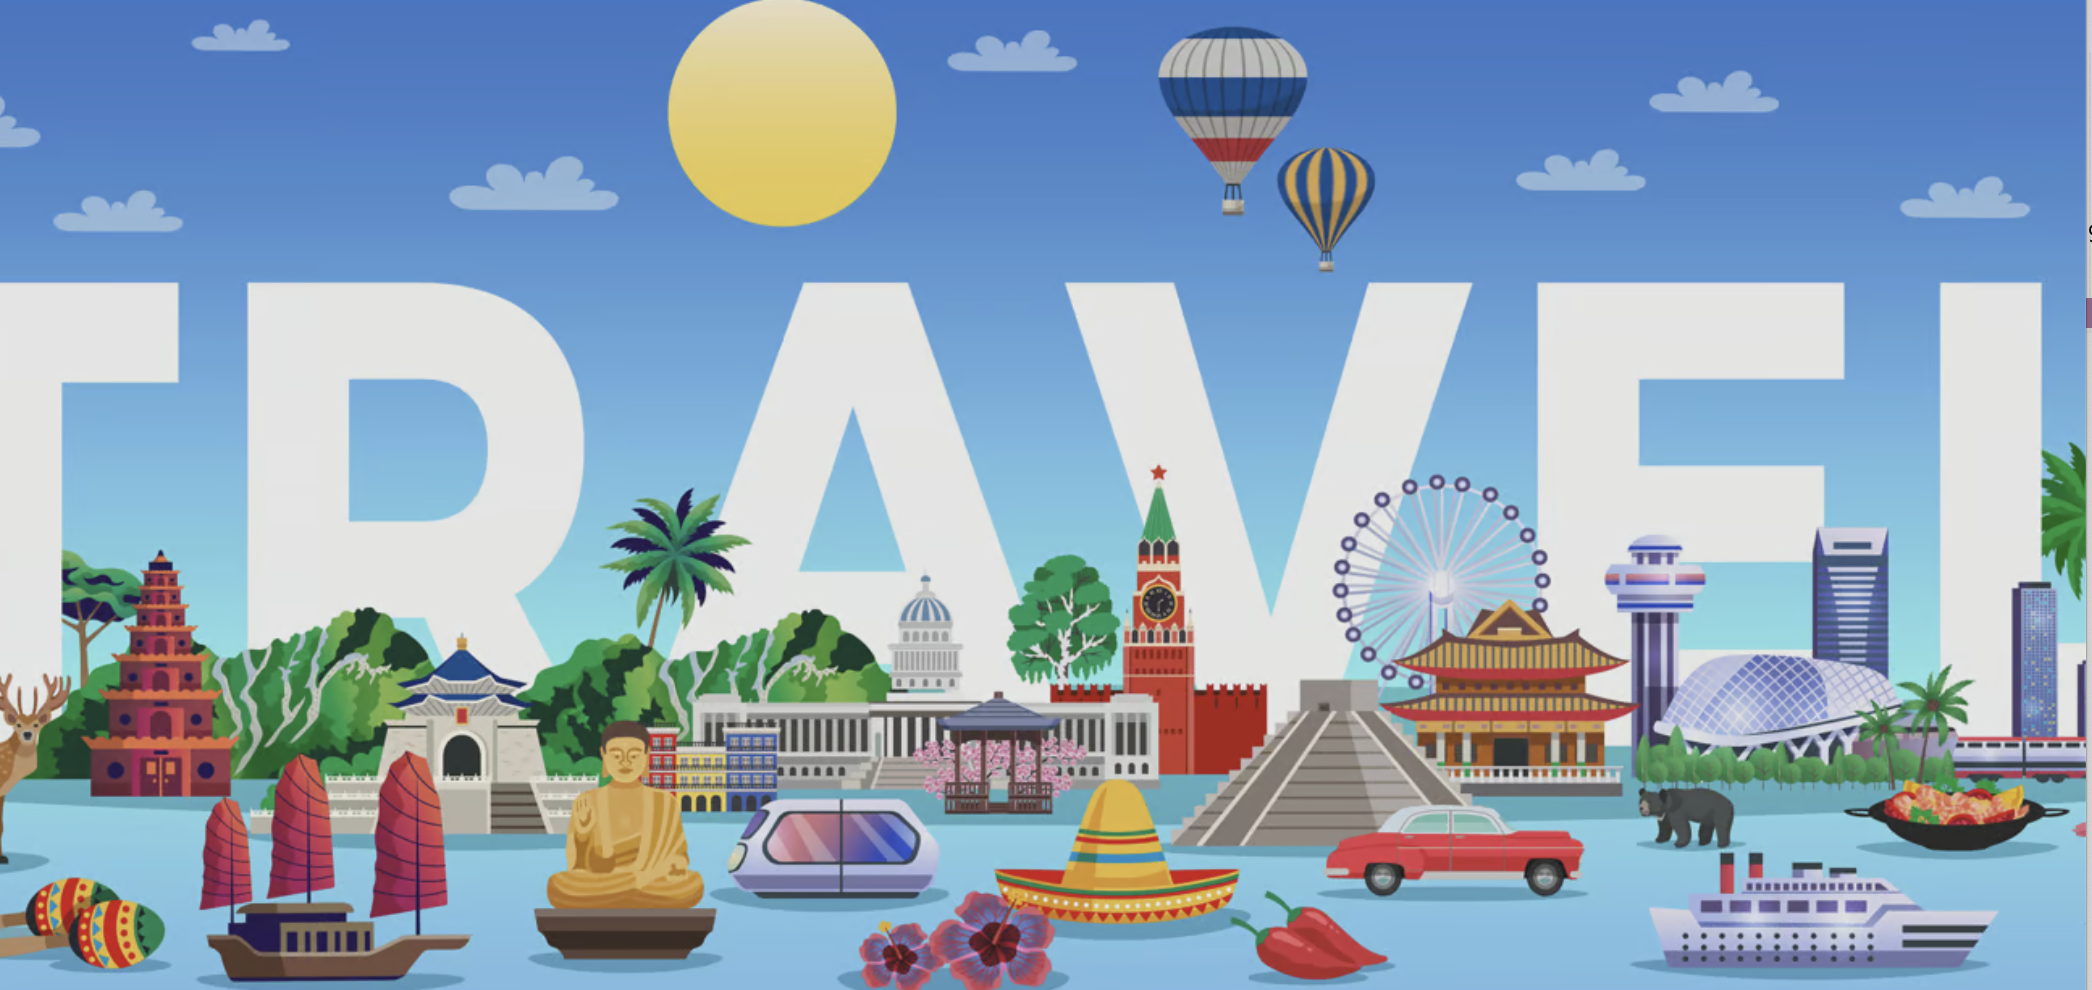

#Insights and Key Findings

**Popular Segments**

Moderate Travelers (1,193 users) and Budget Travelers (992 users) make up the largest user segments. These groups respond well to perks related to convenience and discounts, making them ideal targets for cost-saving or efficiency-based rewards.

**High-Spending Travelers**

High-Spending Travelers (830 users) represent a smaller but valuable segment, with higher spending on both flights and hotels. These users prioritize premium services, suggesting an opportunity for more luxury-focused perks.

**Spontaneous Travelers**

Spontaneous Travelers (653 users) value flexibility, indicating perks like "No cancellation fees" could be crucial in promoting frequent, last-minute bookings.

##**Recommendations**

Based on these findings, we recommend the following steps:


1. Tailor Marketing Based on User Segments
Frequent Travelers should be targeted with loyalty benefits like free hotel nights to maintain their consistent usage.
Budget Travelers will likely respond best to cost-saving incentives and exclusive discounts.

2. Enhance Family Offers
For Family Vacationers, Travel Tide could further enhance the perks by offering family-friendly services such as group booking discounts or activities suited to children.

3. Focus on Retention for Occasional Travelers
To boost engagement from Occasional Travelers, we recommend offering additional incentives like referral bonuses or targeted promotions beyond just loyalty points.

4. Premium Experiences for High-Spending Travelers
High-Spending Travelers are more likely to become brand advocates if offered exclusive, premium perks like VIP lounge access, upgraded hotel stays, or concierge services.

5. A/B Testing for Perk Effectiveness: Conduct A/B testing within each segment to measure the effectiveness of different perks.



#Closing Remarks

**In Conclusion:**
Our segmentation model ensures that every user feels recognized and rewarded, which will drive continued engagement.
Through our detailed segmentation strategy, Travel Tide can implement a highly personalized rewards program that resonates with its users. By leveraging the different behaviors and preferences of each group, the company is well-positioned to drive user engagement and loyalty.



________________________________________________________________________________

#SQL Code

This is the final code for the cohort used on the analysis



```
# This is formatted as code

-- Step 1: Filtered Sessions on Elena's suggested timeframe > Jan 4 2023 & Ids of Users with > 7 Sessions
WITH sessions_2023 AS (
  SELECT user_id
  FROM sessions
  WHERE session_start > '2023-01-04'
  GROUP BY user_id
  HAVING COUNT(session_id) > 7
),

-- Step 2: Aggregated and Combined Data
aggregated_data AS (
    SELECT
        s.user_id,
        -- total number of users sessions
        COUNT(DISTINCT s.session_id) AS num_sessions,
        --average  session duration in minutes
        ROUND(AVG(EXTRACT(MINUTE FROM (session_end - session_start))),2) AS avg_session_duration_minute,
        --average number of clicks across all browsing sessions
        ROUND(AVG(page_clicks),2) AS avg_page_clicks,
        -- total number of trips booked
        COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END) AS total_trips,
        -- dividing the number of booked trips (if no cancellation) by total number of browsing sessions = conversion rate
        ROUND(CASE WHEN COUNT(DISTINCT s.session_id) > 0 THEN
              1.0 * COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END) / COUNT(DISTINCT s.session_id)
              ELSE 0 END ,2) AS conversion_rate,
        -- the proportion of booked trips that were cancelled (returns NULL for users who didn't book any trip to avoid division by zero error)
        ROUND(1.0 * COUNT(DISTINCT CASE WHEN cancellation THEN s.trip_id END) /
              NULLIF(COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END), 0) ,2) AS cancellation_proportion,
        --Average distance flown in KM
        ROUND(AVG(haversine_distance(home_airport_lat, home_airport_lon, destination_airport_lat, destination_airport_lon))) AS avg_distance_flown,
        -- the average time gap between booking and the actual departure
        -- calculating the booking to departure time gap in seconds and then days by dividing by 86400
        ROUND(AVG(EXTRACT(EPOCH FROM (f.departure_time - s.session_end)) / 86400) ,2) AS avg_booking_departure_gap_days_flights,
        -- As some users only booked hotels, I add another calculation considering hotel check_in_time
        ROUND(AVG(EXTRACT(EPOCH FROM (h.check_in_time - s.session_end)) / 86400) ,2) AS avg_booking_departure_gap_days_hotels,  
        -- total number of flights booked by users
        COUNT(DISTINCT CASE WHEN flight_booked THEN s.trip_id END) AS total_flights_booked,
        -- average flight price in USD
        ROUND(AVG(base_fare_usd),2) AS avg_flight_price_usd,
        -- the average discount amount availed for bookings
        ROUND(AVG(flight_discount_amount),2) AS avg_flight_discount_amount,
        -- proportion of flight bookings where users availed discounts
        ROUND(SUM(CASE WHEN flight_discount THEN 1 ELSE 0 END) :: NUMERIC / COUNT(*),2) AS discounted_flight_proportion,
        -- average number of seats booked in flight
        ROUND(AVG(seats),2) AS avg_flight_seats,
        -- average number of checked bags in flights
        ROUND(AVG(checked_bags),2) AS avg_checked_bags,
        -- total number of hotels booked by users
        COUNT(DISTINCT CASE WHEN hotel_booked THEN s.trip_id END) AS total_hotels_booked,
        -- average hotel price in USD
        ROUND(AVG(hotel_per_room_usd * nights * rooms),2) AS avg_hotel_price_usd,
        -- the average discount amount availed for hotel bookings
        ROUND(AVG(hotel_discount_amount),2) AS avg_hotel_discount_amount,
        -- proportion of hotel bookings where users availed discounts
        ROUND(SUM(CASE WHEN hotel_discount THEN 1 ELSE 0 END) :: NUMERIC / COUNT(*),2) AS discounted_hotel_proportion,
        -- average number of rooms booked in hotels
        ROUND(AVG(rooms),2) AS avg_hotel_rooms,
        -- average stay duration in hotel in days (to understand users' preferences for shorter or longer stays)
        ROUND(AVG(EXTRACT(DAY FROM (check_out_time - check_in_time))),2) AS avg_hotel_stay_duration_day,
       -- users who booked two-way flights (round trips proportion)
        ROUND(CASE WHEN COUNT(DISTINCT CASE WHEN flight_booked THEN s.trip_id END) > 0 THEN
              1.0 * COUNT(DISTINCT CASE WHEN return_flight_booked THEN s.trip_id END) /  
              COUNT(DISTINCT CASE WHEN flight_booked THEN s.trip_id END) ELSE 0 END ,2) AS round_trips_proportion,
        --Weekend trips proportion, to distinguish weekend gateway travelers,
        --when the departure time is on Fridays or Saturdays, and return_time is on Sundays or Mondays
       -- and the duration of the trip is less than three days */
        ROUND(CASE WHEN COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END) > 0 THEN
              1.0 * COUNT(DISTINCT CASE WHEN EXTRACT(DOW FROM departure_time) IN (5,6)
                  AND return_flight_booked IS TRUE
                  AND EXTRACT(DAY FROM return_time) IN (0,1)
                  AND EXTRACT(DAY FROM (return_time - departure_time)) < 3
                  THEN f.trip_id
                  ELSE NULL END) / COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END) ELSE 0 END ,2) AS weekend_trip_proportion
        
    FROM
        sessions AS s
    LEFT JOIN
        flights AS f ON s.trip_id = f.trip_id
    LEFT JOIN
        hotels AS h ON s.trip_id = h.trip_id
    LEFT JOIN
        users AS u ON s.user_id = u.user_id
    WHERE
        s.user_id IN (SELECT user_id FROM sessions_2023)
    GROUP BY
        s.user_id
),


-- Step 3: Customer Segmentation
customer_groups AS (
    SELECT
        ad.user_id,  
        CASE
            -- Family Vacationers
            WHEN ad.avg_hotel_rooms > 1 AND ad.avg_hotel_stay_duration_day > 3 THEN 'Family Vacationers'
            -- High-Spending Travelers
            WHEN ad.avg_flight_price_usd >= 1500 OR ad.avg_hotel_price_usd >= 1000 THEN 'High-Spending Travelers'
            -- Budget-Conscious Travelers
            WHEN ad.discounted_flight_proportion >= 0.3 OR ad.discounted_hotel_proportion >= 0.3 THEN 'Budget Travellers'
            -- Frequent Travellers
            WHEN ad.total_trips >= 4 AND ad.cancellation_proportion < 0.1 THEN 'Frequent Travellers'       
            -- Spontaneous Travelers
            WHEN ad.avg_booking_departure_gap_days_flights <= 7 AND ad.cancellation_proportion < 0.1 THEN 'Spontaneous Travelers'
            -- Moderate Travellers
            WHEN ad.total_trips > 3 OR ad.cancellation_proportion < 0.1 THEN 'Moderate Travellers'
            -- Default Perk if no specific criteria met
            ELSE 'Occasional Travellers'
        END AS assigned_group
    FROM
        aggregated_data AS ad
),

-- Step 4: Assign Perks
perks_assignment AS (
    SELECT
        cg.user_id,
        cg.assigned_group,
        CASE
            WHEN cg.assigned_group = 'Family Vacationers' THEN 'Free checked bag'
            WHEN cg.assigned_group = 'High-Spending Travelers' THEN 'Free hotel meal'
            WHEN cg.assigned_group = 'Budget Travellers' THEN 'Exclusive discounts'
            WHEN cg.assigned_group = 'Frequent Travellers' THEN '1 night free hotel with flight'
            WHEN cg.assigned_group = 'Spontaneous Travelers' THEN 'No cancellation fees'
            WHEN cg.assigned_group = 'Moderate Travellers' THEN 'Priority boarding'
            ELSE 'Loyalty points'
        END AS assigned_perk
   FROM
        customer_groups AS cg
)

-- Step 5: Combine user, session, flights, hotel, groups and perks data to create a comprehensive dataset.
SELECT
    u.user_id,
    u.gender,
    CASE
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 18 AND 24 THEN '18-24'
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 25 AND 34 THEN '25-34'
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 35 AND 44 THEN '35-44'
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 45 AND 54 THEN '45-54'
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 55 AND 64 THEN '55-64'
        WHEN DATE_PART('year', AGE(u.birthdate)) >= 65 THEN '65+'
    END AS age_group,
    u.married,
    u.has_children,
    u.home_country,
    u.home_city,
    u.sign_up_date,
    -- browsing sessions info
    ad.num_sessions,
    ad.avg_session_duration_minute,
    ad.avg_page_clicks,
    -- booking behaviour
    ad.total_trips,
    ad.conversion_rate,
    ad.weekend_trip_proportion,
    ad.cancellation_proportion,
    ad.avg_booking_departure_gap_days_flights,
    ad.avg_booking_departure_gap_days_hotels,
    -- booked flights info
    ad.round_trips_proportion,
    ad.avg_flight_price_usd,
    ad.avg_flight_discount_amount,
    ad.discounted_flight_proportion,
    ad.avg_flight_seats,
    ad.avg_checked_bags,
    ad.avg_distance_flown,  
    -- booked hotels info
    ad.total_hotels_booked,
    ad.avg_hotel_price_usd,
    ad.avg_hotel_discount_amount,
    ad.discounted_hotel_proportion,
    ad.avg_hotel_rooms,
    ad.avg_hotel_stay_duration_day,
    -- Info Customer groups
    pa.assigned_group,
    -- Info perks assignment
    pa.assigned_perk
FROM
    users AS u
JOIN
    aggregated_data AS ad ON u.user_id = ad.user_id
JOIN
    perks_assignment AS pa ON u.user_id = pa.user_id;
```



Here is my Tableau Link

[Tableau Dashboard](https://public.tableau.com/app/profile/lilian.fuchs/viz/TRaveltideFinal1/Dashboard1?publish=yes)

[Slides](https://docs.google.com/presentation/d/1_IuWdCiTaKmicf2bOGwBgYAuXRzWx1QBFwxb5LQnT6o/edit#slide=id.p)